In [1]:
import requests
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import cov
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
! pip install numpy scikit-learn statsmodels

In [2]:
apikey = "14a2c22344444a2fac18026e71f60bf8"
url_current_state_data = f'https://api.covidactnow.org/v2/states.json?apiKey={apikey}'

###  Parse the api for current metrics and use states as our index

In [3]:
jsn = requests.get(url_current_state_data).json()
df_current_metrics = pd.DataFrame([item['metrics'] for item in jsn], index=[item['state'] for item in jsn] )
df_current_metrics.head()

,testPositivityRatio,testPositivityRatioDetails,caseDensity,weeklyNewCasesPer100k,contactTracerCapacityRatio,infectionRate,infectionRateCI90,icuCapacityRatio,bedsWithCovidPatientsRatio,weeklyCovidAdmissionsPer100k,vaccinationsInitiatedRatio,vaccinationsCompletedRatio,vaccinationsAdditionalDoseRatio,vaccinationsFall2022BivalentBoosterRatio
AK,0.073,{'source': 'other'},3.7,25.7,None,0.64,0.30,0.75,0.019,4.9,0.732,0.653,0.325,0.141
AL,0.031,{'source': 'other'},4.3,29.9,None,1.09,0.10,0.83,0.011,2.1,0.651,0.533,0.212,0.076
AR,0.060,{'source': 'other'},4.3,29.8,None,1.10,0.11,0.80,0.021,3.2,0.701,0.570,0.255,0.109
AZ,0.074,{'source': 'other'},6.3,44.0,None,1.12,0.10,0.66,0.029,3.8,0.783,0.662,0.332,0.156
CA,0.048,{'source': 'other'},4.3,30.4,None,1.13,0.10,0.71,0.024,3.3,0.850,0.749,0.442,0.204


In [4]:
df_current_metrics.cov() 
# We wanted to look at relationships between variables before creating visualizations and performing other analysis

,testPositivityRatio,caseDensity,weeklyNewCasesPer100k,infectionRate,infectionRateCI90,icuCapacityRatio,bedsWithCovidPatientsRatio,weeklyCovidAdmissionsPer100k,vaccinationsInitiatedRatio,vaccinationsCompletedRatio,vaccinationsAdditionalDoseRatio,vaccinationsFall2022BivalentBoosterRatio
testPositivityRatio,0.003172,0.032909,0.228520,0.001439,-0.000816,0.000213,0.000078,0.010699,-0.000264,-0.000240,0.000041,-0.000148
caseDensity,0.032909,3.364902,23.549973,0.180942,-0.087056,-0.004687,0.001474,0.745576,-0.019629,-0.014628,0.005745,-0.036938
weeklyNewCasesPer100k,0.228520,23.549973,164.862384,1.266633,-0.608940,-0.034423,0.010266,5.225804,-0.138238,-0.102450,0.039786,-0.258801
infectionRate,0.001439,0.180942,1.266633,0.029521,-0.013565,0.003372,0.000455,0.016514,-0.001271,-0.001633,-0.001102,-0.002279
infectionRateCI90,-0.000816,-0.087056,-0.608940,-0.013565,0.057409,-0.001628,-0.000381,0.009025,0.001603,0.002708,0.001456,-0.000502
icuCapacityRatio,0.000213,-0.004687,-0.034423,0.003372,-0.001628,0.009503,0.000230,-0.013155,-0.000191,-0.000067,-0.000490,-0.000304
bedsWithCovidPatientsRatio,0.000078,0.001474,0.010266,0.000455,-0.000381,0.000230,0.000053,0.001614,0.000036,0.000037,0.000062,0.000060
weeklyCovidAdmissionsPer100k,0.010699,0.745576,5.225804,0.016514,0.009025,-0.013155,0.001614,1.210603,-0.003696,-0.010131,-0.010893,-0.003003
vaccinationsInitiatedRatio,-0.000264,-0.019629,-0.138238,-0.001271,0.001603,-0.000191,0.000036,-0.003696,0.012197,0.010457,0.007967,0.004904
vaccinationsCompletedRatio,-0.000240,-0.014628,-0.102450,-0.001633,0.002708,-0.000067,0.000037,-0.010131,0.010457,0.009895,0.008319,0.004728


### Importing and Cleaning Election Data 

In [5]:
url_votes = "https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv"

In [6]:
df_votes = pd.read_csv(url_votes)
df_votes.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184
1,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623
2,Alabama,1005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631
3,Alabama,1007,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280
4,Alabama,1009,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022


In [7]:
df_votes = df_votes.set_index('state_name')
df_votes
gop_votes = df_votes.groupby('state_name')['votes_gop'].sum()
dem_votes = df_votes.groupby('state_name')['votes_dem'].sum()
total_votes_in_state = df_votes.groupby('state_name')['total_votes'].sum() 

In [8]:
df_voting=pd.concat([gop_votes,total_votes_in_state, dem_votes],axis=1)
df_voting['vote share for GOP'] = df_voting["votes_gop"]/df_voting["total_votes"]
df_voting['vote share for DEM'] = df_voting['votes_dem']/df_voting['total_votes']
df_voting.head()

,votes_gop,total_votes,votes_dem,vote share for GOP,vote share for DEM
state_name,,,,,
Alabama,1441168,2323304,849648,0.620310,0.365707
Alaska,189892,391346,153405,0.485228,0.391993
Arizona,1661686,3387326,1672143,0.490560,0.493647
Arkansas,760647,1219069,423932,0.623957,0.347751
California,6005961,17495906,11109764,0.343278,0.634992


In [9]:
df_current_metrics_new = df_current_metrics.drop(['PR', 'MP'])
# The api included Puerto Rico and Northern Marina Islands but our eletion data is just states so we create a new df and drop those columns

### Parse the api for the actuals data which is cumulative data from start of Pandemic

In [10]:
df_current_actuals = pd.DataFrame([item['actuals'] for item in jsn], index=[item['state'] for item in jsn] )
df_current_actuals

,cases,deaths,positiveTests,negativeTests,contactTracers,hospitalBeds,hsaHospitalBeds,icuBeds,hsaIcuBeds,newCases,newDeaths,vaccinesDistributed,vaccinationsInitiated,vaccinationsCompleted,vaccinationsAdditionalDose,vaccinationsFall2022BivalentBooster,vaccinesAdministered,vaccinesAdministeredDemographics,vaccinationsInitiatedDemographics
AK,297389,1468,399303,4389547,235,"{'capacity': 1251, 'currentUsageTotal': 909, '...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 118, 'currentUsageTotal': 89, 'cu...","{'capacity': None, 'currentUsageTotal': None, ...",0,0,2171395.0,535588.0,477506.0,237456.0,102980.0,1326639.0,None,None
AL,1658639,21137,1290612,8060242,404,"{'capacity': 12043, 'currentUsageTotal': 8854,...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 1411, 'currentUsageTotal': 1175, ...","{'capacity': None, 'currentUsageTotal': None, ...",1464,0,12322100.0,3192610.0,2611270.0,1041488.0,373812.0,7014357.0,None,None
AR,994386,13115,581910,4819784,790,"{'capacity': 6307, 'currentUsageTotal': 4299, ...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 694, 'currentUsageTotal': 554, 'c...","{'capacity': None, 'currentUsageTotal': None, ...",898,0,8357480.0,2114689.0,1719884.0,768248.0,329158.0,4870800.0,None,None
AZ,2471546,33417,2220812,14059309,396,"{'capacity': 13721, 'currentUsageTotal': 10749...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 1454, 'currentUsageTotal': 955, '...","{'capacity': None, 'currentUsageTotal': None, ...",3206,0,19916930.0,5701722.0,4820249.0,2416941.0,1136552.0,14630900.0,None,None
CA,12242634,101785,11811843,160763296,10600,"{'capacity': 59485, 'currentUsageTotal': 45745...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 6349, 'currentUsageTotal': 4484, ...","{'capacity': None, 'currentUsageTotal': None, ...",12010,0,120813275.0,33603152.0,29583959.0,17449475.0,8073407.0,88366823.0,None,None
CO,1781579,14371,1789382,17493036,1300,"{'capacity': 8878, 'currentUsageTotal': 6006, ...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 1077, 'currentUsageTotal': 637, '...","{'capacity': None, 'currentUsageTotal': None, ...",1119,0,17740375.0,4836265.0,4247213.0,2458643.0,1258975.0,13018349.0,None,None
CT,981895,12334,1104084,15651962,860,"{'capacity': 7427, 'currentUsageTotal': 5721, ...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 873, 'currentUsageTotal': 602, 'c...","{'capacity': None, 'currentUsageTotal': None, ...",0,0,11857995.0,3668858.0,2966448.0,1651810.0,905174.0,9032746.0,None,None
DC,178829,1434,287644,5557585,268,"{'capacity': 3240, 'currentUsageTotal': 2608, ...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 306, 'currentUsageTotal': 252, 'c...","{'capacity': None, 'currentUsageTotal': None, ...",0,0,NaN,NaN,NaN,NaN,NaN,NaN,None,"{'age': {'12-15': 17298, '16-17': 7709, '16-19..."
DE,333738,3394,363333,3870999,211,"{'capacity': 2402, 'currentUsageTotal': 1897, ...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 169, 'currentUsageTotal': 130, 'c...","{'capacity': None, 'currentUsageTotal': None, ...",0,0,3341285.0,861732.0,715754.0,369875.0,206186.0,2169096.0,None,None
FL,7542869,87141,8414894,58147872,2600,"{'capacity': 49754, 'currentUsageTotal': 37489...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 5819, 'currentUsageTotal': 4214, ...","{'capacity': None, 'currentUsageTotal': None, ...",0,0,61381235.0,17803041.0,14967975.0,6580456.0,2496214.0,42231211.0,None,"{'age': {'12-14': 91571, '15-24': 774834, '25-..."


In [11]:
icu_beds1=df_current_actuals['icuBeds']
icu_beds1

AK    {'capacity': 118, 'currentUsageTotal': 89, 'cu...
AL    {'capacity': 1411, 'currentUsageTotal': 1175, ...
AR    {'capacity': 694, 'currentUsageTotal': 554, 'c...
AZ    {'capacity': 1454, 'currentUsageTotal': 955, '...
CA    {'capacity': 6349, 'currentUsageTotal': 4484, ...
CO    {'capacity': 1077, 'currentUsageTotal': 637, '...
CT    {'capacity': 873, 'currentUsageTotal': 602, 'c...
DC    {'capacity': 306, 'currentUsageTotal': 252, 'c...
DE    {'capacity': 169, 'currentUsageTotal': 130, 'c...
FL    {'capacity': 5819, 'currentUsageTotal': 4214, ...
GA    {'capacity': 2428, 'currentUsageTotal': 1901, ...
HI    {'capacity': 210, 'currentUsageTotal': 141, 'c...
IA    {'capacity': 547, 'currentUsageTotal': 393, 'c...
ID    {'capacity': 224, 'currentUsageTotal': 158, 'c...
IL    {'capacity': 2933, 'currentUsageTotal': 1798, ...
IN    {'capacity': 1978, 'currentUsageTotal': 1365, ...
KS    {'capacity': 717, 'currentUsageTotal': 517, 'c...
KY    {'capacity': 1239, 'currentUsageTotal': 94

In [12]:
my_list =[]
for i in icu_beds1:
    i=dict(i)
    my_list.append(i['capacity'])

In [13]:
my_list

[118,
 1411,
 694,
 1454,
 6349,
 1077,
 873,
 306,
 169,
 5819,
 2428,
 210,
 547,
 224,
 2933,
 1978,
 717,
 1239,
 1301,
 1203,
 1158,
 297,
 2298,
 819,
 1187,
 None,
 670,
 178,
 2025,
 195,
 465,
 239,
 2701,
 368,
 756,
 3954,
 3566,
 874,
 617,
 3400,
 585,
 151,
 1053,
 213,
 2225,
 6119,
 507,
 1833,
 82,
 1058,
 1107,
 568,
 104]

In [14]:
df_current_actuals['IcuBedsCapacity'] = my_list

In [15]:
df_population= pd.DataFrame([item['population'] for item in jsn], index=[item['state'] for item in jsn] )
df_population.head()
# Get the state populations so we can do analysis based on rates 

,0
AK,731545
AL,4903185
AR,3017804
AZ,7278717
CA,39512223


In [16]:
df_current_actuals["population"] = df_population

In [17]:
df_current_actuals_new = df_current_actuals.drop(['PR', 'MP'])
# The api included Puerto Rico and Northern Marina Islands but our eletion data is just states so we create a new df and drop those columns

In [18]:
df_analyze = pd.DataFrame()

In [19]:
df_analyze["DeathsPer100k"] = df_current_actuals_new["deaths"]/df_current_actuals_new["population"] *100000
df_analyze["VaccinationsCompletedPercentage"] = df_current_actuals_new["vaccinationsCompleted"]/df_current_actuals_new["population"] *100
df_analyze["Percentage_with_Booster"] = df_current_actuals_new["vaccinationsAdditionalDose"]/df_current_actuals_new["population"] *100
df_analyze["ICU_Capacity_Ratio"] = df_current_metrics["icuCapacityRatio"]
df_analyze['IcuBeds']= df_current_actuals['IcuBedsCapacity']

In [20]:
df_analyze.head()

,DeathsPer100k,VaccinationsCompletedPercentage,Percentage_with_Booster,ICU_Capacity_Ratio,IcuBeds
AK,200.671182,65.273633,32.459521,0.75,118.0
AL,431.087140,53.256608,21.241050,0.83,1411.0
AR,434.587535,56.991243,25.457187,0.80,694.0
AZ,459.105636,66.223883,33.205591,0.66,1454.0
CA,257.603831,74.872930,44.162220,0.71,6349.0


In [21]:
mean_value_VaccinationsCompletedPercentage=df_analyze['VaccinationsCompletedPercentage'].mean()
df_analyze['VaccinationsCompletedPercentage'].fillna(value=mean_value_VaccinationsCompletedPercentage, inplace=True)

In [22]:
mean_value_Percentage_with_Booster=df_analyze['Percentage_with_Booster'].mean()
df_analyze['Percentage_with_Booster'].fillna(value=mean_value_Percentage_with_Booster, inplace=True)

In [23]:
df_analyze['Percentage_with_Booster'].isnull()

AK    False
AL    False
AR    False
AZ    False
CA    False
CO    False
CT    False
DC    False
DE    False
FL    False
GA    False
HI    False
IA    False
ID    False
IL    False
IN    False
KS    False
KY    False
LA    False
MA    False
MD    False
ME    False
MI    False
MN    False
MO    False
MS    False
MT    False
NC    False
ND    False
NE    False
NH    False
NJ    False
NM    False
NV    False
NY    False
OH    False
OK    False
OR    False
PA    False
RI    False
SC    False
SD    False
TN    False
TX    False
UT    False
VA    False
VT    False
WA    False
WI    False
WV    False
WY    False
Name: Percentage_with_Booster, dtype: bool

In [24]:
df_analyze["VaccinationsCompletedPercentage"]=df_analyze["VaccinationsCompletedPercentage"].round(decimals=2)
df_analyze["Percentage_with_Booster"] = df_analyze["Percentage_with_Booster"].round(decimals=2)

In [25]:
df_analyze["DeathsPer100k"] = df_analyze['DeathsPer100k'].round(decimals=2)

In [26]:
df_analyze.head()

,DeathsPer100k,VaccinationsCompletedPercentage,Percentage_with_Booster,ICU_Capacity_Ratio,IcuBeds
AK,200.67,65.27,32.46,0.75,118.0
AL,431.09,53.26,21.24,0.83,1411.0
AR,434.59,56.99,25.46,0.80,694.0
AZ,459.11,66.22,33.21,0.66,1454.0
CA,257.60,74.87,44.16,0.71,6349.0


In [27]:
df_analyze['icuBedsper100k'] = df_analyze['IcuBeds']/df_current_actuals["population"] *100000
df_analyze["icuBedsper100k"] = df_analyze["icuBedsper100k"].round(decimals=2)

In [28]:
df_analyze.head()

,DeathsPer100k,VaccinationsCompletedPercentage,Percentage_with_Booster,ICU_Capacity_Ratio,IcuBeds,icuBedsper100k
AK,200.67,65.27,32.46,0.75,118.0,16.13
AL,431.09,53.26,21.24,0.83,1411.0,28.78
AR,434.59,56.99,25.46,0.80,694.0,23.00
AZ,459.11,66.22,33.21,0.66,1454.0,19.98
CA,257.60,74.87,44.16,0.71,6349.0,16.07


<AxesSubplot:>

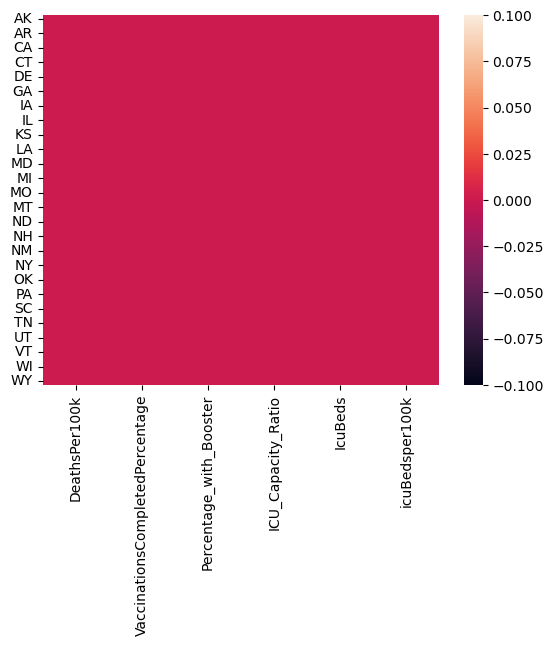

In [29]:
columns = df_analyze.columns 
sns.heatmap(df_analyze[columns].isnull()) 

# GUI displaying our Data Visualizations

In [30]:
from tkinter import *
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure

### First tkinter with National Data

In [49]:
# For final submission we realized it would be easier to incorparate oop because it would make it easier to create widgets and reset our graphs
class PlotWindow(tk.Frame):
    def __init__(self, master=None):
        super().__init__(master)
        self.master = master
        self.master.title("Graph Plotter")
        self.create_widgets()

    def create_widgets(self):
        self.figures = []
        
        #Create label
        self.label=tk.Label(self.master, text='Welcome to our Covid Data Analysis Page', font=('Nexa', 24, 'bold'))
        self.label.pack(side="top",padx=20, pady=20)
        
        #create line of text prompting user to select a button
        self.button_select = tk.Label(self.master, text='Please select a button to see corresponding graphs', font=('Nexa', 14))
        self.button_select.pack(side="top", padx=20, pady=10)
                                      
        #create a line explaining to reset
        self.explain_reset = tk.Label(self.master, text='(Hit reset when you would like to select a new button)', font=('Nexa', 9))
        self.explain_reset.pack(side='top', padx=5, pady=5)
        
        #sub header label
        self.sub_label=Label(self.master,text='Variables defined', font=('Nexa', 14,))
        self.sub_label.pack(side="top",padx=15, pady=15)
        
        #using label to create a passage that explains each variable
        self.label_explanation = tk.Label(self.master, text='Case Density represents how many cases per 100k of population each state currenlty has.\n Death rate represents cumulative deaths from covid-19 which traces back to the start of the pandemic and then adjusted per 100k of population.\nIcu capacity ratio represents the proportion of a states icu beds that a currently in use.\nWe used data from the 2020 presidential election to see how political preferences related to covid data.')
        self.label_explanation.pack(side="top", padx=20, pady=20)
        
        # Create four buttons
        self.button1 = tk.Button(self.master, text="What Affects Case Density", command=self.plot_graph1)
        self.button2 = tk.Button(self.master, text="What Affects Death Rate", command=self.plot_graph2)
        self.button3 = tk.Button(self.master, text="Effect of ICU Capacity Ratio on Death", command=self.plot_graph3)
        self.button4 = tk.Button(self.master, text="Political Preferences", command=self.plot_graph4)
        self.button5 = tk.Button(self.master, text="Reset", command=self.reset_plots)

        # Add buttons to the window
        self.button1.pack(side="left", fill="x", expand=True, anchor="n", pady=10)
        self.button2.pack(side="left", fill="x", expand=True, anchor="n",pady=10)
        self.button3.pack(side="left", fill="x", expand=True, anchor="n", pady=10)
        self.button4.pack(side="left", fill="x", expand=True, anchor="n", pady=10)
        self.button5.pack(side="left", fill="x", expand=True, anchor="n" ,pady=10)

    def plot_graph1(self):
       # Plot 1: Vaccinations Completed Ratio vs Case Density   
        fig, axs = plt.subplots(2, 2, figsize=(15,15))
        axs[0,0].scatter(df_current_metrics['vaccinationsCompletedRatio'], df_current_metrics['caseDensity'], color='blue')
        axs[0,0].set_title('Current Vaccine Initiated Ratio vs Case Density')
        axs[0,0].set_xlabel("Vaccines Completed Ratio")
        axs[0,0].set_ylabel("Case Density, %")

    # Plot 2: Vote Share for GOP vs Case Density   
        axs[0,1].scatter(df_voting["vote share for GOP"], df_current_metrics_new['caseDensity'], color='red')
        axs[0,1].set_title('Vote Share for GOP vs Case Density')
        axs[0,1].set_xlabel("Vote Share for GOP")
        axs[0,1].set_ylabel("Case Density%")

    # Plot 3: Percent Boosted vs Case Density 
        axs[1,0].scatter(df_analyze['Percentage_with_Booster'], df_current_metrics_new['caseDensity'], color='orange')
        axs[1,0].set_title('% Boosted vs Case Density')
        axs[1,0].set_xlabel(" % Boosted")
        axs[1,0].set_ylabel("Case Density, %")

    # Plot 4: Vote Share for DEM vs Case Density
        axs[1,1].scatter(df_voting["vote share for DEM"], df_current_metrics_new['caseDensity'], color='blue')
        axs[1,1].set_title('Vote Share for DEM vs Case Density')
        axs[1,1].set_xlabel("Vote Share for DEM")
        axs[1,1].set_ylabel("Case Density%")
    
        fig.subplots_adjust(hspace=0.5, wspace=0.5) #adjust spacing
        
        canvas = FigureCanvasTkAgg(fig, master=self.master)
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        self.figures.append(canvas)

    def plot_graph2(self):
        fig, axs = plt.subplots(2, 2, figsize=(20,20))

    # Scatterplot 1: Vaccine completed percentage vs. death rate per 100k people    
        axs[0,0].scatter(df_analyze["VaccinationsCompletedPercentage"], df_analyze["DeathsPer100k"], color='Blue')
        axs[0,0].set_title('Vaccine Completed % VS Death Rate Per 100k')
        axs[0,0].set_xlabel("Vaccine Completed %")
        axs[0,0].set_ylabel("Death Rate per 100k")
        r, p = stats.pearsonr(df_analyze["VaccinationsCompletedPercentage"], df_analyze["DeathsPer100k"])
        axs[0,0].annotate('r = {:.2f}'.format(r), xy=(0.05, 0.1), xycoords='axes fraction')
        slope, intercept = np.polyfit(df_analyze["VaccinationsCompletedPercentage"],df_analyze["DeathsPer100k"], 1)
        axs[0,0].plot(df_analyze["VaccinationsCompletedPercentage"], slope * df_analyze["VaccinationsCompletedPercentage"] + intercept,color='red')

    # Scatterplot 2: Percentage of people boosted vs. death rate per 100k people    
        axs[0,1].scatter(df_analyze['Percentage_with_Booster'], df_analyze['DeathsPer100k'], color='Orange')
        axs[0,1].set_title('% of People Boosted vs Death Rate ')
        axs[0,1].set_xlabel("% of People Boosted")
        axs[0,1].set_ylabel("Death Rate")
        r, p = stats.pearsonr(df_analyze['Percentage_with_Booster'], df_analyze["DeathsPer100k"])
        axs[0,1].annotate('r = {:.2f}'.format(r), xy=(0.05, 0.1), xycoords='axes fraction')
        slope, intercept = np.polyfit(df_analyze['Percentage_with_Booster'],df_analyze["DeathsPer100k"], 1)
        axs[0,1].plot(df_analyze['Percentage_with_Booster'], slope * df_analyze['Percentage_with_Booster'] + intercept,color='blue')

     # Scatterplot 3: Case density vs. death rate per 100k people   
        axs[1,0].scatter(df_current_metrics_new['caseDensity'], df_analyze['DeathsPer100k'], color='Red')
        axs[1,0].set_title('Case Density vs Death Rate')
        axs[1,0].set_xlabel("Case Density")
        axs[1,0].set_ylabel("Death Rate")
        
    # Scatterplot 4: Infection rate vs. death rate per 100k people    
        axs[1,1].scatter(df_current_metrics_new['infectionRate'], df_analyze['DeathsPer100k'], color='Green')
        axs[1,1].set_title('Infection Rate vs Death Rate')
        axs[1,1].set_xlabel("Infection Rate")
        axs[1,1].set_ylabel("Death Rate")

    
        fig.subplots_adjust(hspace=0.6, wspace=1)
        
        canvas = FigureCanvasTkAgg(fig, master=self.master)
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        self.figures.append(canvas)

    def plot_graph3(self):
    
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.scatter(df_analyze["ICU_Capacity_Ratio"], df_analyze["DeathsPer100k"], color='red')
        slope, intercept = np.polyfit(df_analyze["ICU_Capacity_Ratio"],df_analyze["DeathsPer100k"], 1)
        ax.plot(df_analyze["ICU_Capacity_Ratio"], slope * df_analyze["ICU_Capacity_Ratio"] + intercept,color='blue')
    
        plt.title('ICU Capacity Ratio vs DeathsPer100k')
        plt.xlabel('ICU Capacity Ratio')
        plt.ylabel('DeathsPer100k')

     # Annotate the plot with the Pearson correlation coefficient   
        r, p = stats.pearsonr(df_analyze["ICU_Capacity_Ratio"], df_analyze["DeathsPer100k"])
        ax.annotate('r = {:.2f}'.format(r), xy=(0.90, 0.1), xycoords='axes fraction')
        canvas = FigureCanvasTkAgg(fig, master=self.master)
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        self.figures.append(canvas)

    def plot_graph4(self):
        fig, axs = plt.subplots(2, 2, figsize=(20,20))

   #the relationship between vote share for GOP and infection rate   
        axs[0,0].scatter(df_voting["vote share for GOP"], df_current_metrics_new["infectionRate"], color='red')
        axs[0,0].set_title('Share for GOP vs Infection Rate')
        axs[0,0].set_xlabel("Vote Share for GOP")
        axs[0,0].set_ylabel("Infection Rate")
        

#the relationship between vote share for DEM and infection rate    
        axs[0,1].scatter(df_voting["vote share for DEM"], df_current_metrics_new["infectionRate"], color='blue')
        axs[0,1].set_title('Share for DEM vs Infection Rate')
        axs[0,1].set_xlabel("Vote Share for DEM")
        axs[0,1].set_ylabel("Infection Rate")
     
    #relationship between vote share for GOP and vaccinations completed percentage        
        axs[1,0].scatter(df_voting["vote share for GOP"], df_analyze["VaccinationsCompletedPercentage"], color='red')
        axs[1,0].set_title('Share for GOP vs Vaccinations Complete % ')
        axs[1,0].set_xlabel("Vote Share for GOP")
        axs[1,0].set_ylabel("Vaccinations Completed")
        slope, intercept = np.polyfit(df_voting["vote share for GOP"],df_analyze["VaccinationsCompletedPercentage"], 1)
        axs[1,0].plot(df_voting["vote share for GOP"], slope * df_voting["vote share for GOP"] + intercept,color='blue')
        r, p = stats.pearsonr(df_voting["vote share for GOP"], df_analyze["VaccinationsCompletedPercentage"])
        axs[1,0].annotate('r = {:.2f}'.format(r), xy=(0.05, 0.1), xycoords='axes fraction')

    #relationship between vote share for DEM and vaccinations completed percentage    
        axs[1,1].scatter(df_voting["vote share for DEM"], df_analyze["VaccinationsCompletedPercentage"], color='blue')
        axs[1,1].set_title('Share for DEM vs Vaccinations Complete %')
        axs[1,1].set_xlabel("Vote Share for DEM")
        axs[1,1].set_ylabel("Vaccinations Completed")
        slope, intercept = np.polyfit(df_voting["vote share for DEM"],df_analyze["VaccinationsCompletedPercentage"], 1)
        axs[1,1].plot(df_voting["vote share for DEM"], slope * df_voting["vote share for DEM"] + intercept,color='red')
        r, p = stats.pearsonr(df_voting["vote share for DEM"], df_analyze["VaccinationsCompletedPercentage"])
        axs[1,1].annotate('r = {:.2f}'.format(r), xy=(0.75, 0.1), xycoords='axes fraction')
        
        fig.subplots_adjust(hspace=0.6, wspace=1)
    
        canvas = FigureCanvasTkAgg(fig, master=self.master)
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        self.figures.append(canvas)
        
    def reset_plots(self):
        for figure in self.figures:
            figure.get_tk_widget().destroy()
        self.figures = []



def main():
    root = tk.Tk()
    root.title("Main Window")
    app = PlotWindow(master=root)
    root.mainloop()

main()

### Second tkinter with State Data

In [50]:
# we used oop so that we did not need a reset button itself the selection automatically changed


class CovidTracker:
    def __init__(self, root):
        self.root = root
        self.root.title("Covid Tracker")

        # Create subheader label
        label = tk.Label(root, text='See State Data', font=('Nexa', 15, 'bold'))
        label.pack(anchor=CENTER)

        # Create dropdown menu and button
        item_list = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
        self.value = tk.StringVar()
        self.value.set("Select a State:")
        dropdown = tk.OptionMenu(self.root, self.value, *item_list)
        dropdown.pack(padx=5, pady=5)

        choose_button = tk.Button(self.root, text="Click to choose", command=self.get_all)
        choose_button.pack(padx=5, pady=5)

        # Initialize result label
        self.result_label = tk.Label(self.root, text="")
        self.result_label.pack(padx=5, pady=5)

    def get_all(self):
        # Get state data from API
        apikey = "14a2c22344444a2fac18026e71f60bf8"
        state = self.value.get()
        
        state_out = requests.get(f'https://api.covidactnow.org/v2/state/{state}.json?apiKey={apikey}').text
        state_response = json.loads(state_out)
        actuals = state_response['actuals']
        cases = actuals['cases']
        cases_text = f'Cumulative confirmed or suspected COVID cases: {cases}'

        vaccines = actuals['vaccinationsCompleted']
        vaccines_text = f'Cumulative number of vaccinations completed: {vaccines}'

        deaths = actuals['deaths']
        deaths_text = f'Cumulative confirmed or suspected COVID deaths: {deaths}'

        metrics = state_response['metrics']
        weekly = metrics['weeklyNewCasesPer100k']
        metrics_text = f'Number of new cases per 100k population over the last week: {weekly}'

        population = state_response['population']
        vaccination_ratio = (vaccines / population) * 100
        population_text = f'Vaccination ratio (% of population vaccinated): {vaccination_ratio:.2f}'

        # Update the result label
        self.result_label.config(text=f"{cases_text}\n{vaccines_text}\n{deaths_text}\n{metrics_text}\n{population_text}")

root = tk.Tk()
root.title("Main Window")
root.geometry('1000x500')

# Create instance of CovidTracker class
app = CovidTracker(root)

# Start the GUI event loop
root.mainloop()

# Simple Regression Analysis of Booster Rates effect on Mortality

In [33]:
from sklearn import linear_model
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression

In [34]:
X= df_analyze["Percentage_with_Booster"]
y= df_analyze["DeathsPer100k"]

In [35]:
X = sm.add_constant(X)

In [36]:
import statsmodels.api as sm
sm_model = sm.OLS(y, X)
results = sm_model.fit()

print(results.summary())
                              

                            OLS Regression Results                            
Dep. Variable:          DeathsPer100k   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     16.92
Date:                Thu, 11 May 2023   Prob (F-statistic):           0.000148
Time:                        20:59:59   Log-Likelihood:                -291.67
No. Observations:                  51   AIC:                             587.3
Df Residuals:                      49   BIC:                             591.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Our model estimates that for every one percent increase in a given states boosted population, the death rate per 100k for that state is 5.2223 deaths lower.

## Using GEOPANDAS to show regional relationships

In [37]:
!pip install geopandas
!pip install shapely

import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

<AxesSubplot:>

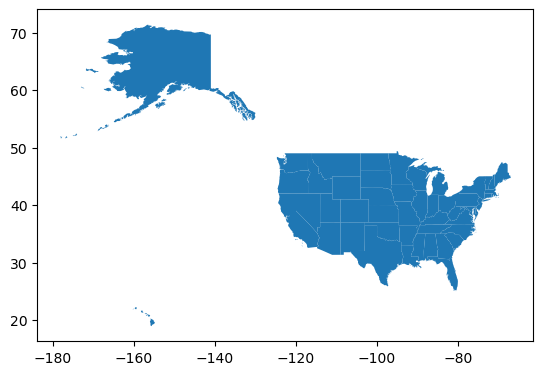

In [38]:
#importing shapefile and reading it
shapefile = "states.geojson"
readmap = gpd.read_file(shapefile)
readmap.plot()

In [39]:
#renaming column names in states shapefile to lowercase (to merge with df_analyze)
readmap = readmap.rename(columns={'Program':'program', 'State_Code':'state_code', 'State_Name':'state_name', 'Flowing_St':'flowing_st'})

#creating column name for index (state_code)
df_analyze_statecol = df_analyze.copy()
df_analyze_statecol.index.name = 'state_code'

#merging shapefile dataframe with COVID dataframe on "state_code" column name
merged_df = readmap.merge(df_analyze_statecol, on="state_code")

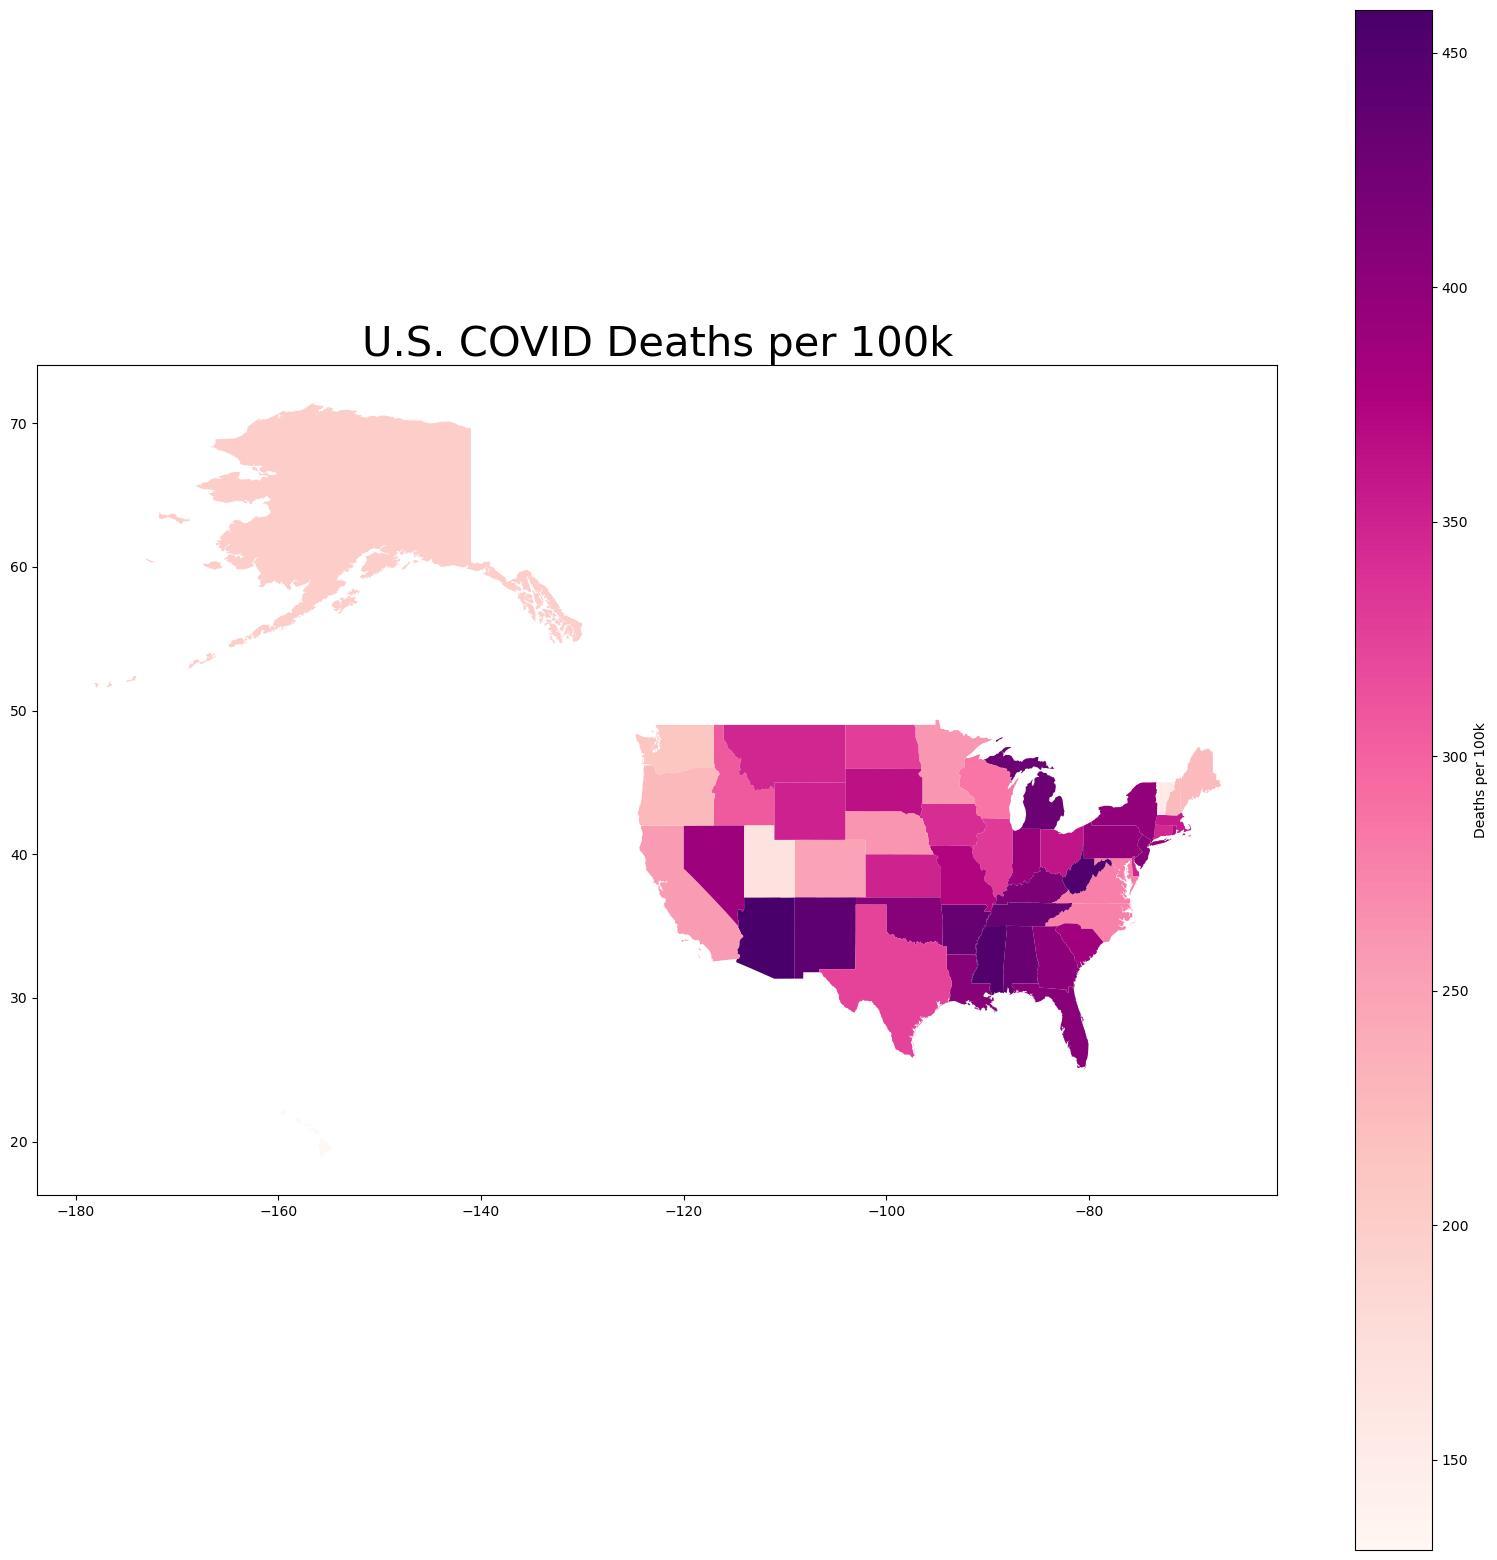

In [40]:
DeathPlot = merged_df.plot(column='DeathsPer100k',
            cmap='RdPu',
            linewidth=0.9,
            figsize=(20,20),
            legend=True,
            legend_kwds={'label':"Deaths per 100k",
                        'orientation':"vertical"})

DeathPlot.set_title("U.S. COVID Deaths per 100k")
DeathPlot.title.set_size(30)

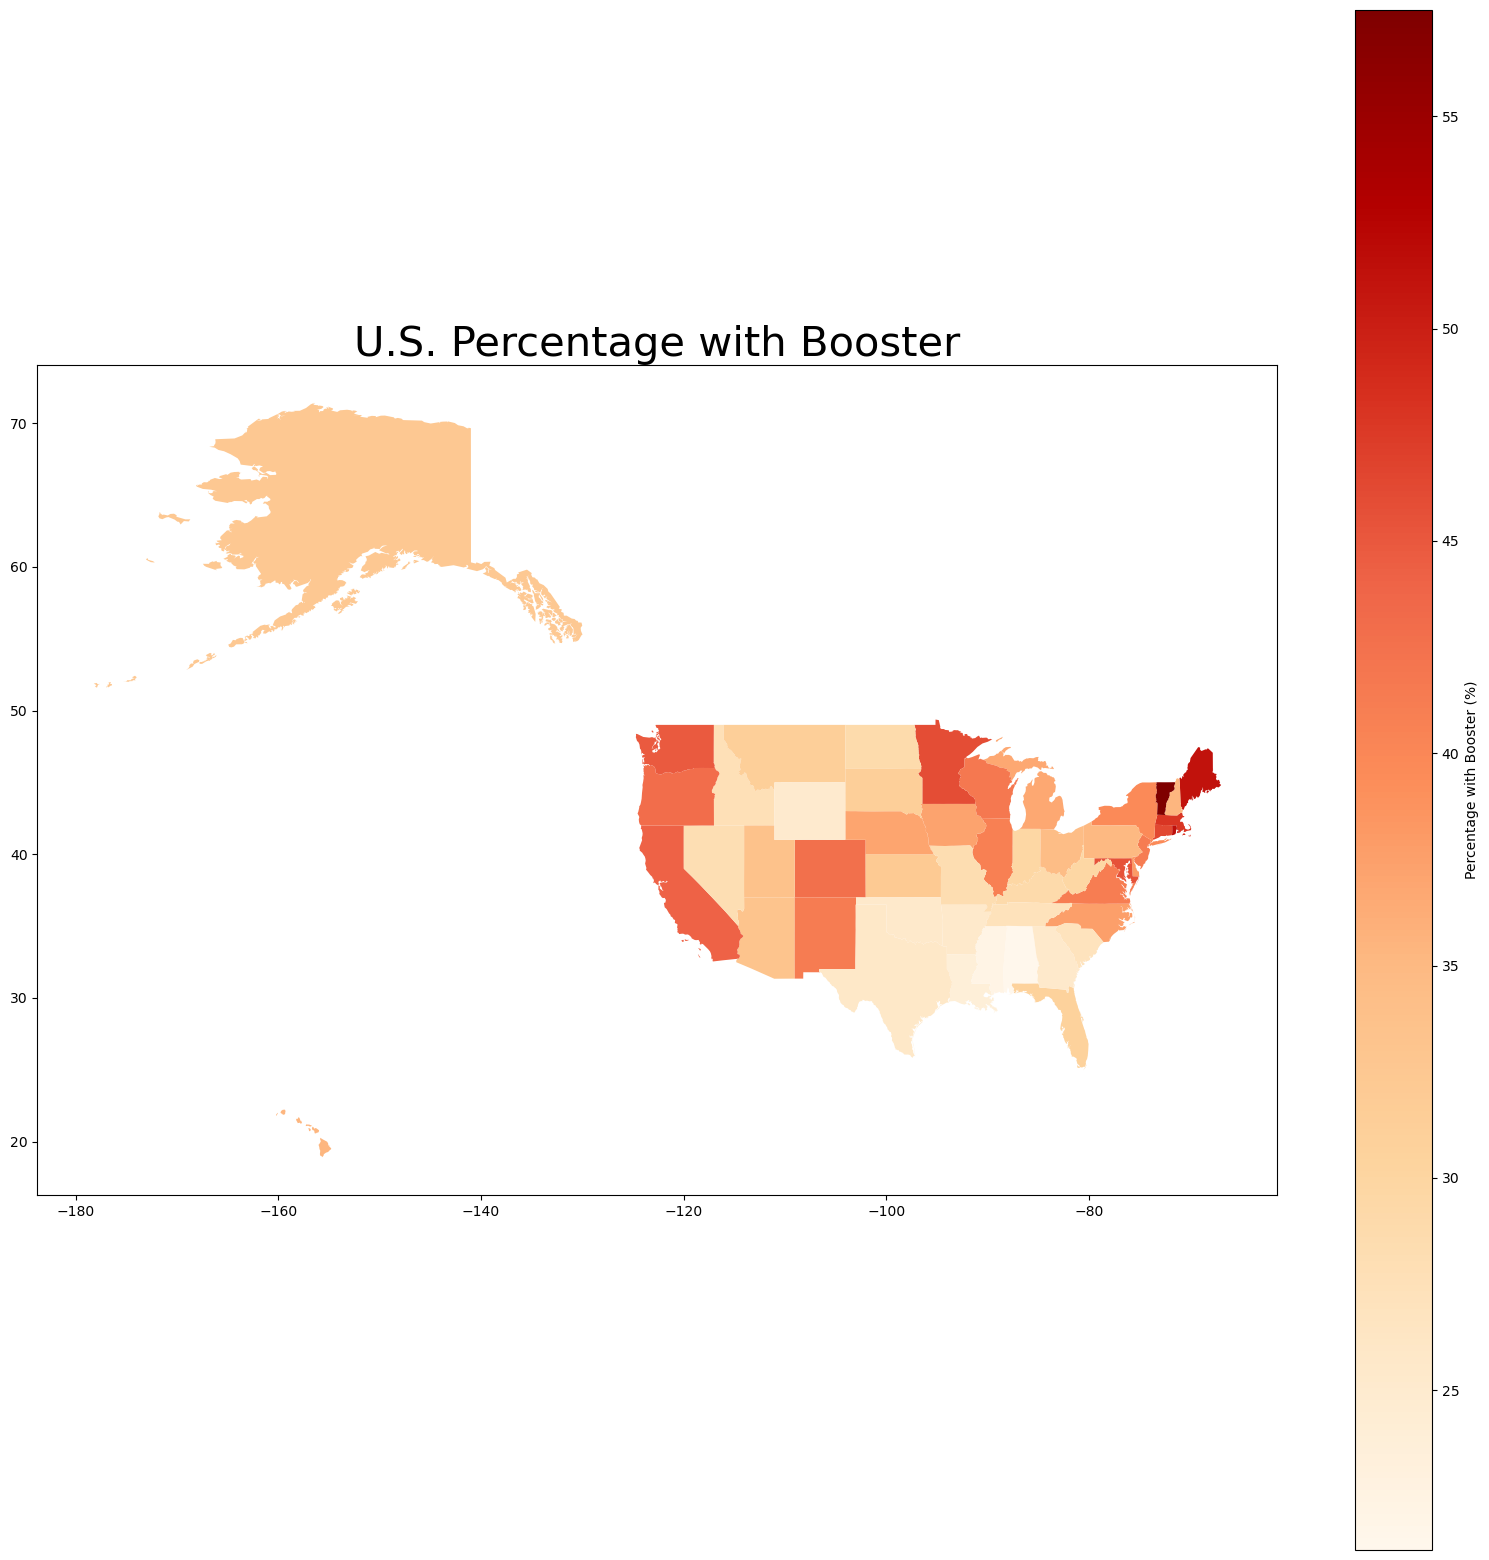

In [41]:
BoosterPlot = merged_df.plot(column='Percentage_with_Booster',
            cmap='OrRd',
            linewidth=0.9,
            figsize=(20,20),
            legend=True,
            legend_kwds={'label':"Percentage with Booster (%)",
                        'orientation':"vertical"})

BoosterPlot.set_title("U.S. Percentage with Booster")
BoosterPlot.title.set_size(30)

# Documentation

### Covid Data
- https://apidocs.covidactnow.org/

### Election Data
- https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv

### Geopandas Resources
- https://geopandas.org/en/stable/docs/user_guide/mapping.html
- https://pypi.org/project/Shapely/
- https://hub.arcgis.com/datasets/CMHS::states-shapefile/about

### Regression Resources
- https://realpython.com/linear-regression-in-python/
- https://scikit-learn.org/stable/

### OOP Resources
- https://www.pythontutorial.net/tkinter/tkinter-object-oriented-window/